# 第 13 章 数据可视化进阶

**本章内容提要**:

- Seaborn <https://mp.weixin.qq.com/s/AU-IEEQvmBxBZ7GBZIZwBA>
- plotnine <https://zhuanlan.zhihu.com/p/47814353> <https://plotnine.readthedocs.io/en/stable/about-plotnine.html>
- Bokeh


前面章节中我们使用的绘图方法都来自于 Matplotlib 库，它是 Python 可视化的基础。随着近年来数据分析的流行，Python 社区出现了越来越多的可视化库，包括基于 Matplotlib 库的 Seaborn 和支持交互式展示的 Bokeh。它们提供了更易用、更美观、交互性更强的可视化方式。本章将对目前流行的 Python 高级可视化库进行介绍，并通过一些例子展示它们的使用方法和可视化效果。

## 13.1 Seaborn

Seaborn 在 Matplotlib 库的基础上进行了更高级的封装，提供了更高级别的接口用于绘制优雅美观、具有吸引力的统计图形。

读者可以在终端中使用以下命令之一安装 Seaborn 库：

```bash
# 安装方法 1
conda install seaborn
# 安装方法 2
pip install seaborn
```

Seaborn 的默认别名是 sns，所以导入时一般采用以下的约定：

In [2]:
import seaborn as sns

我们接下来依旧使用之前提及的汽车统计数据用于可视化。

In [3]:
import pandas as pd
import numpy as np

mtcars = pd.read_csv('files/chapter11/mtcars.csv')

我们先查看整个数据集的信息，结果显示一共有 11 个变量（列），32 辆车的记录。

In [10]:
mtcars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 11 columns):
mpg     32 non-null float64
cyl     32 non-null int64
disp    32 non-null float64
hp      32 non-null int64
drat    32 non-null float64
wt      32 non-null float64
qsec    32 non-null float64
vs      32 non-null int64
am      32 non-null int64
gear    32 non-null int64
carb    32 non-null int64
dtypes: float64(5), int64(6)
memory usage: 2.9 KB


为了观察变量的数值分布，我们一般使用 describe() 方法进行数据汇总。

In [4]:
mtcars.describe()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
count,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.0000
mean,20.090625,6.187500,230.721875,146.687500,3.596563,3.217250,17.848750,0.437500,0.406250,3.687500,2.8125
std,6.026948,1.785922,123.938694,68.562868,0.534679,0.978457,1.786943,0.504016,0.498991,0.737804,1.6152
min,10.400000,4.000000,71.100000,52.000000,2.760000,1.513000,14.500000,0.000000,0.000000,3.000000,1.0000
25%,15.425000,4.000000,120.825000,96.500000,3.080000,2.581250,16.892500,0.000000,0.000000,3.000000,2.0000
50%,19.200000,6.000000,196.300000,123.000000,3.695000,3.325000,17.710000,0.000000,0.000000,4.000000,2.0000
75%,22.800000,8.000000,326.000000,180.000000,3.920000,3.610000,18.900000,1.000000,1.000000,4.000000,4.0000
max,33.900000,8.000000,472.000000,335.000000,4.930000,5.424000,22.900000,1.000000,1.000000,5.000000,8.0000


相比于汇总表格，图形更加直观，特别是在观察数据的变化趋势方面。这时候，Seaborn 库就排上用场了。

### 13.1.1 成对图

我们接下来使用成对的图形来展示两两变量之间的变化趋势。

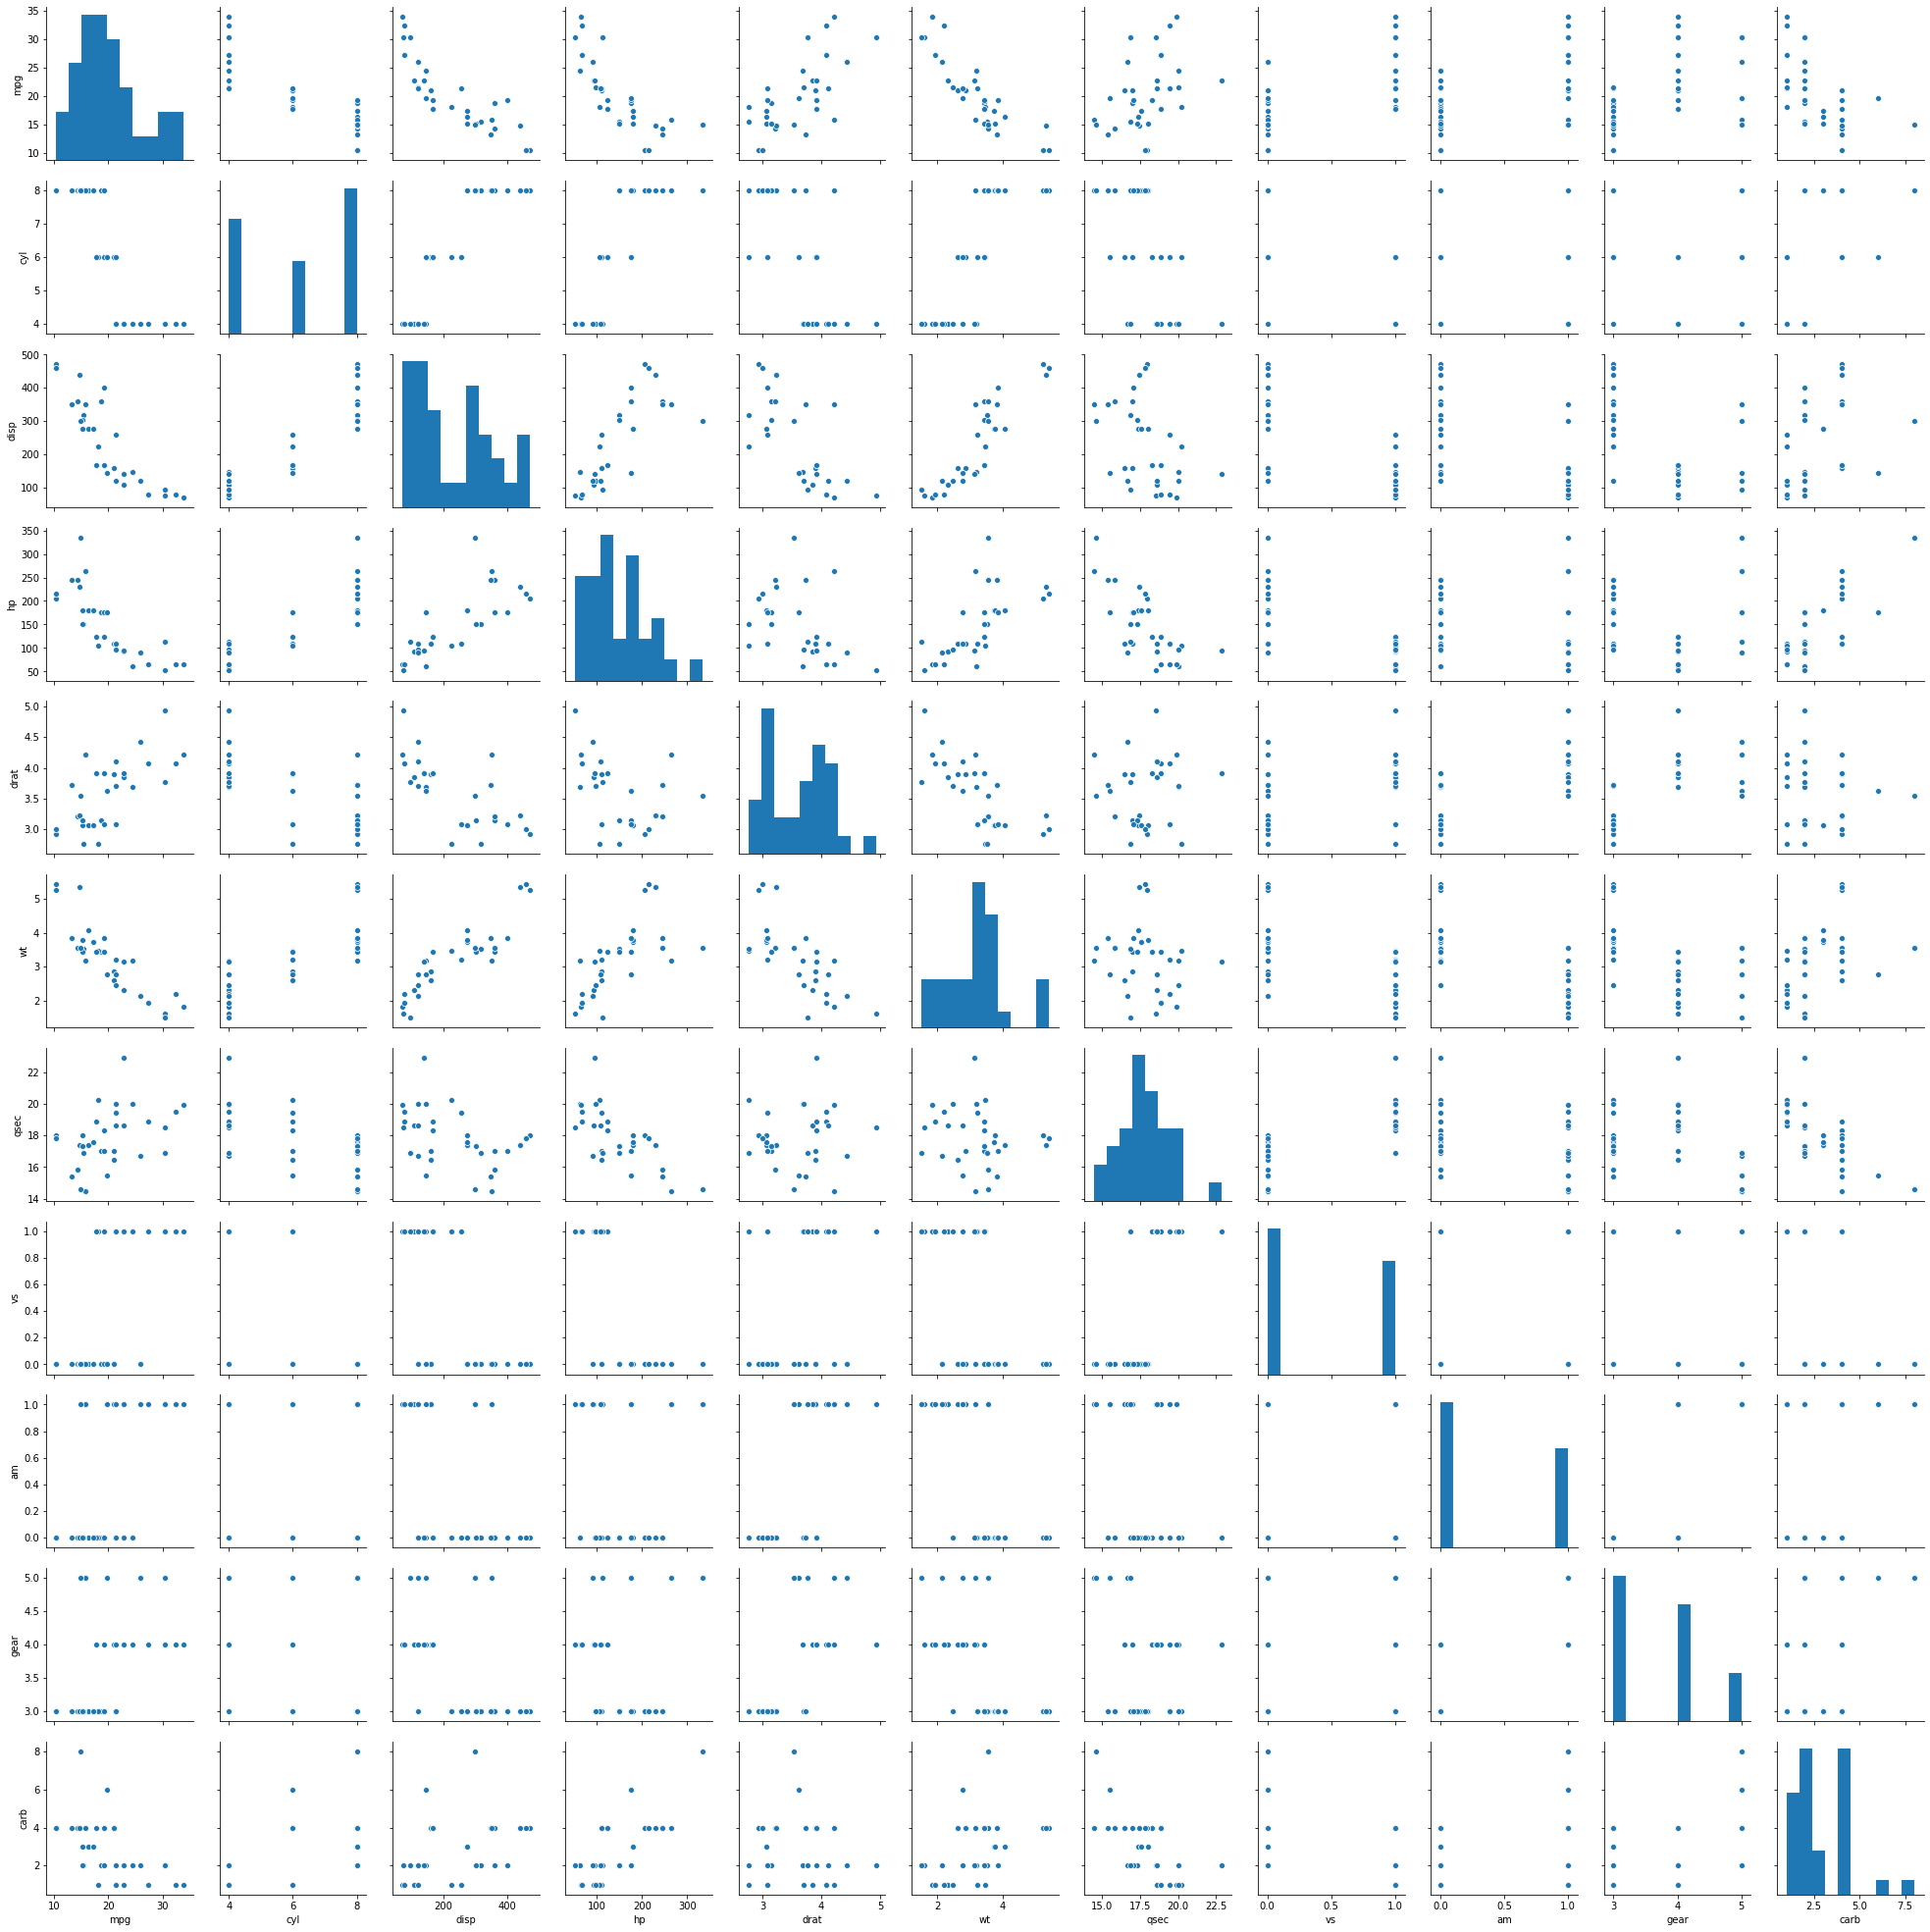

In [7]:
%matplotlib inline
sns.pairplot(mtcars)

上图对角线展示的是单个变量的数据分布，我们可以非常直观地观测到哪些变量是离散的，哪些是连续的，连续变量的分布趋势是怎样的。非对角线展示的是两个变量之间的变化趋势。

第 3 到 第 7 个变量看起来存在着比较明显的线性关系，我们单独展示它们看看。

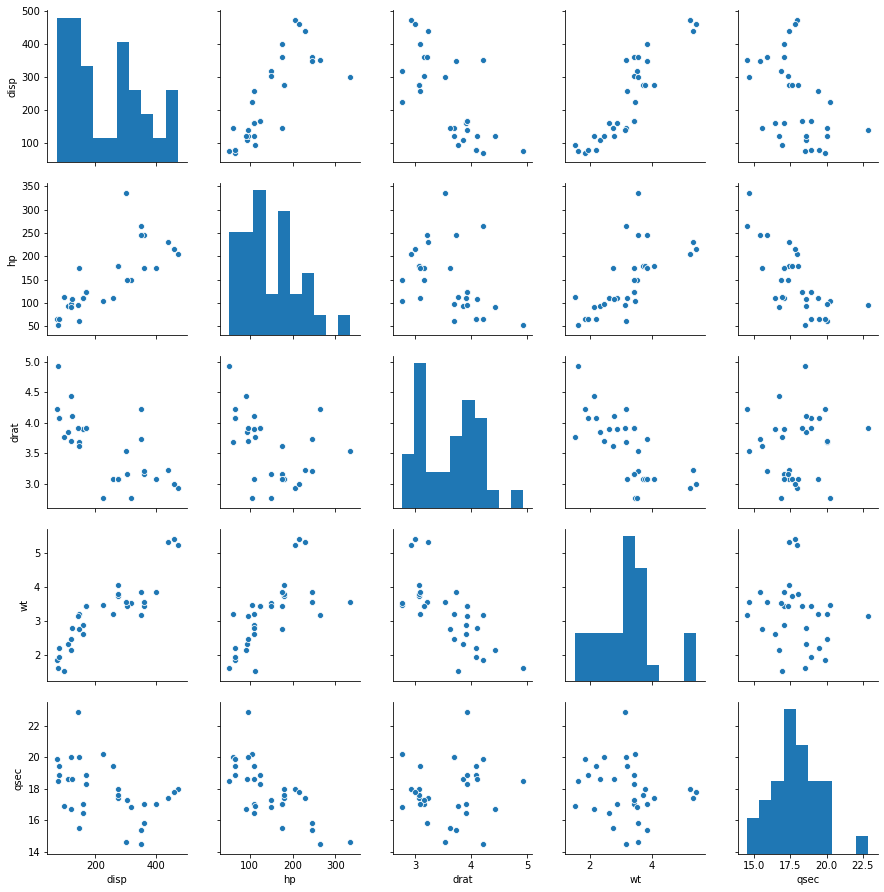

In [12]:
sns.pairplot(mtcars.iloc[:, 2:7])

特别地，我们查看下汽车重量和每加仑油耗行驶的英里数之间的关系。

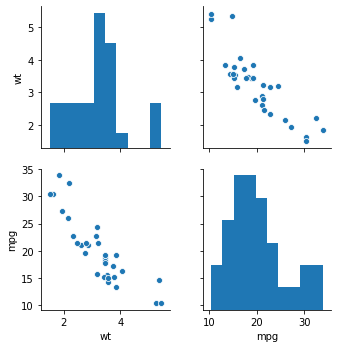

In [13]:
sns.pairplot(mtcars.loc[:, ['wt', 'mpg']])

不难发现汽车越重，车程越短。这种关系是否会受到其他因素的影响呢？例如，汽车的气缸数。我们将 cyl 加入绘图并根据它的值赋予颜色，生成带分类标签的图。

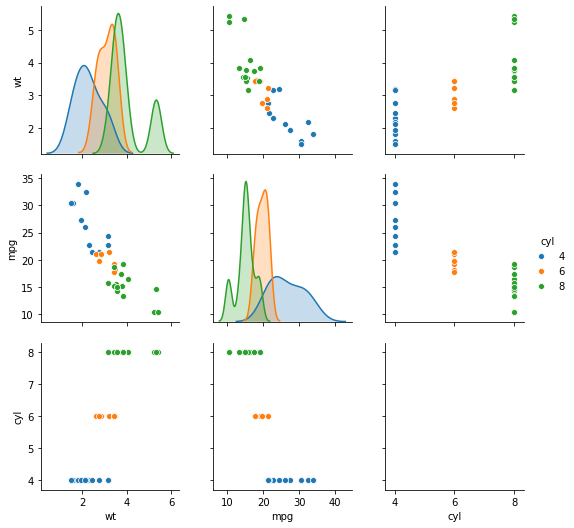

In [17]:
sns.pairplot(mtcars.loc[:, ['wt', 'mpg', 'cyl']], hue='cyl')

第 2 个子图的结果告诉我们上述的关系不受气缸数的影响，另外我们可以看到气缸数越多的车辆重量也越大。这些结果与我们的常识一致。

默认 Seaborn 使用的是白色的（背景）风格，我们可以通过 set_style() 函数进行修改。

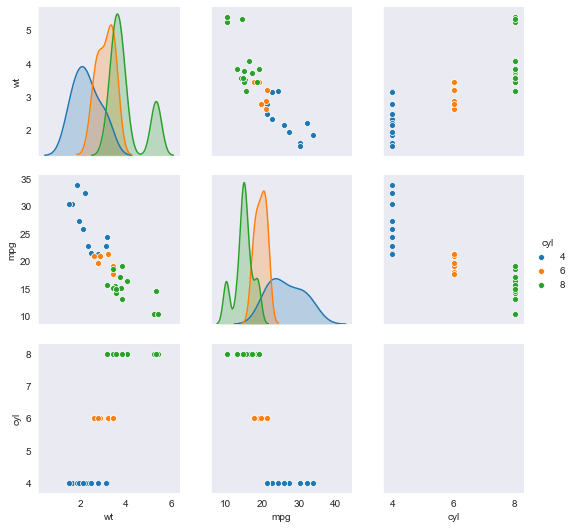

In [21]:
sns.set_style('dark')
sns.pairplot(mtcars.loc[:, ['wt', 'mpg', 'cyl']], 
             hue='cyl')

可以设置的选项一共有 5 种：darkgrid、whitegrid、dark、white 和 ticks。

我们还可以使用 set_palette() 修改调色板，例如，让上面图形的配色更适合色盲人观看。

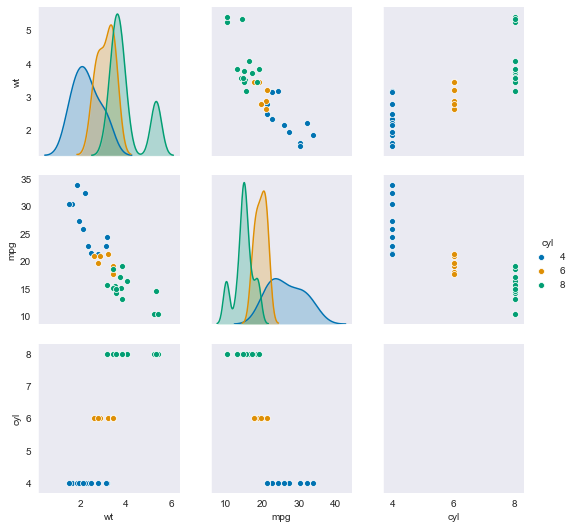

In [23]:
sns.set_style('dark')
sns.set_palette('colorblind')
sns.pairplot(mtcars.loc[:, ['wt', 'mpg', 'cyl']], 
             hue='cyl')

Seaborn 支持六种调色盘：deep、muted、pastel、bright、dark 和 colorblind。

### 13.1.2 子集图

上面我们是通过 Pandas 的数据筛选操作仅展示我们想要观察的变量，实际上 Seaborn 本身就支持子集图的展示，只需要将展示的变量传入 vars 参数。

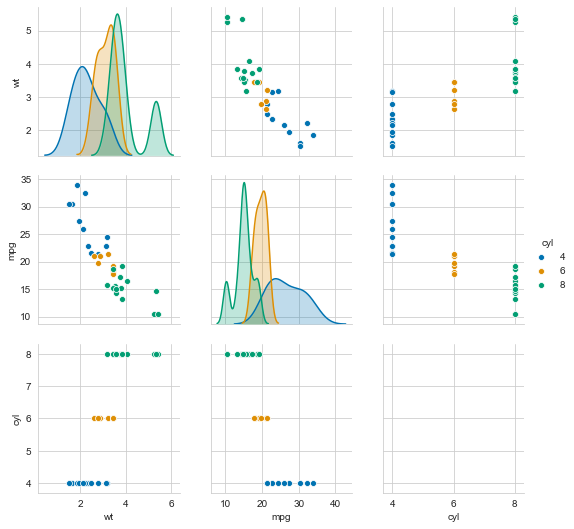

In [24]:
sns.set_style('whitegrid')
sns.pairplot(mtcars, 
             hue='cyl',
             vars=['wt', 'mpg', 'cyl'])

下面代码将风格设为白色，并用横轴和纵轴展示不同的变量，也就是说可以用 4 个子图展示 4 个变量之间的数据分布趋势。然后加上颜色信息，一共可以展示 5 个变量。

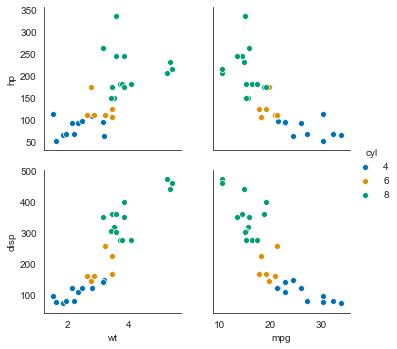

In [25]:
sns.set_style('white')
sns.pairplot(mtcars,
            hue='cyl',
            x_vars=['wt', 'mpg'],
            y_vars=['hp', 'disp'])

### 13.1.3 回归图

上一个图我们看到 4 个变量之间存在明显的线性关系，当我们添加选项 kind='reg' 后，Seaborn 会自动为图形添加上回归线。

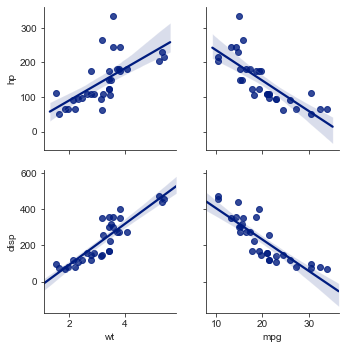

In [27]:
sns.set_style('ticks')
sns.set_palette('dark')
sns.pairplot(mtcars,
            x_vars=['wt', 'mpg'],
            y_vars=['hp', 'disp'],
            kind='reg')

### 13.1.4 核密度图

核密度图在展示数据的平滑分布时更为有效，这可以通过 diag_kind='kde' 让对角线展示每个变量分布的核密度估计。

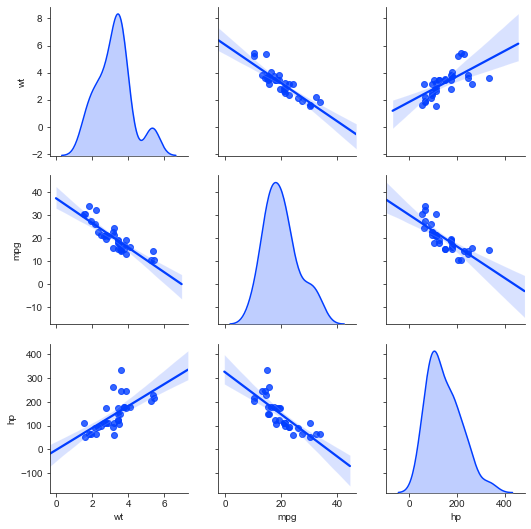

In [29]:
sns.set_palette('bright')
sns.pairplot(mtcars.loc[:, ['wt', 'mpg', 'hp']],
            kind='reg', diag_kind='kde')

前面 pairplot() 提供的丰富特性已经足以满足很多的数据探索性分析需求。接下来本书会介绍一些统计分析常见图形的 Seaborn 实现，它们的使用非常简单，一般通过指定绘图使用的 DataFrame 和坐标轴需要展示的变量名称就可以完成绘图。

### 13.1.5 条形图

barplot() 函数用于绘制条形图，下面结果展示了汽车不同气缸数行程的差别。注意，竖线表示置信区间。

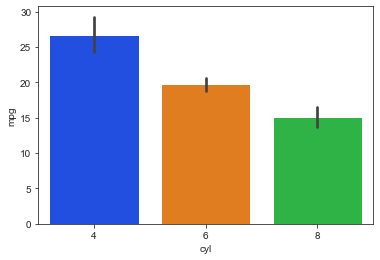

In [30]:
sns.barplot(x='cyl', y='mpg', data=mtcars)

我们看看引擎类型变量 vs 的不同是否会影响上述的差异。

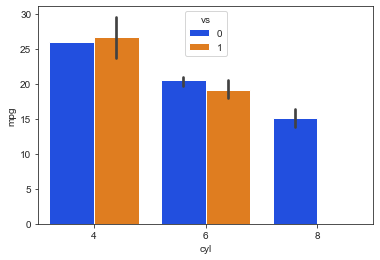

In [31]:
sns.barplot(x='cyl', y='mpg', hue='vs',
            data=mtcars)

结果表明汽车行程不怎么受引擎类型的影响。

### 13.1.6 计数图

countplot() 函数用于绘制计数图，该种图形类型适合分类数据，如气缸数。

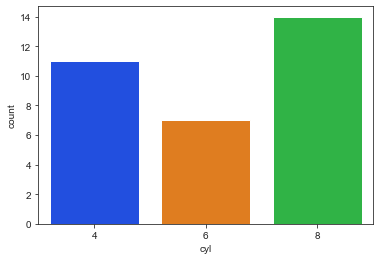

In [32]:
sns.countplot(x='cyl', data=mtcars)

不难发现 32 种汽车气缸数为 8 的最多，为 6 的最少。

### 13.1.7 点图

pointplot() 函数用于绘制点图。点图的使用率很高，适用范围也很广泛。

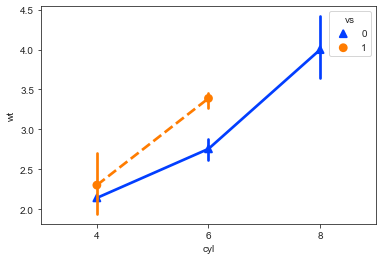

In [37]:
sns.pointplot(x='cyl', 
              y='wt',
              hue='vs',
              markers=['^', 'o'],
              linestyles=['-', '--'],
              data=mtcars)

相比于条形图，线图更适用于展示不同引擎类型下汽车重量随气缸数的变化。

### 13.1.8 箱线图

boxplot() 函数用于绘制箱线图。箱线图在统计分析中非常常用，相比于线图和条形图，它可以简单直观的观察数据的样本量、分布以及差异。

使用和上一个图一样的数据和变量，下面的箱线图显示效果完全不同于线图。

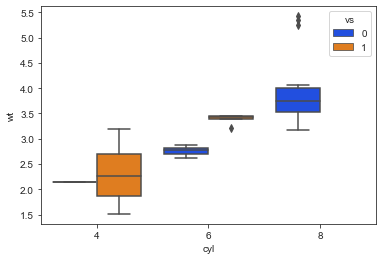

In [39]:
sns.boxplot(x='cyl', 
              y='wt',
              hue='vs',
              data=mtcars)

### 13.1.9 小提琴图

violinplot() 函数用于绘制小提琴图。小提琴图是箱线图的拓展，它增加了对数据分布更为直观的视觉感受。

使用与箱线图完全一致的数据，我们再看看小提琴图是如何的。

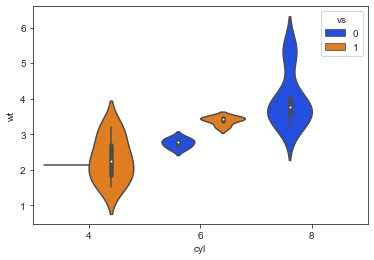

In [40]:
sns.violinplot(x='cyl', 
               y='wt',
               hue='vs',
               data=mtcars)

### 13.1.10 双变量分布图

本节最后介绍的是双变量分布图，它用于展示双变量的分布和关系，通过 jointplot() 函数实现。

下面绘制图形展示行程和汽车重量的一维分布与二维核密度。

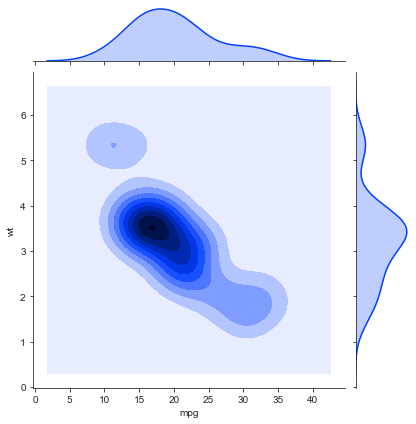

In [41]:
sns.jointplot(x='mpg', y='wt',
             data=mtcars,
             kind='kde')

下面通过修改 kind 选项展示上述两个变量的直方图和线性回归图。

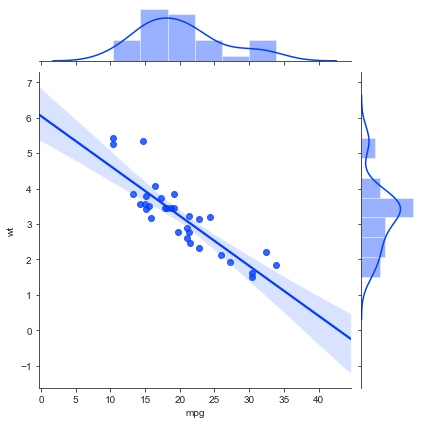

In [42]:
sns.jointplot(x='mpg', y='wt',
             data=mtcars,
             kind='reg')

## 13.2 Plotnine

ggplot2 是基于《图形语法》的 R 语言实现，它提供了非常灵活的图形生成和组合方法，目前有大量的拓展包。由于 ggplot2 的流行性，有开发者将它的功能移植到了 Python 社区，并命名为 plotnine。

读者可以在终端中使用以下命令之一安装 plotnine 库：

```bash
# 安装方法 1
conda install -c conda-forge plotnine
# 安装方法 2
pip install plotnine
```

plotnine 库的语法与 R 语言的 ggplot2 基本一致，不过需要在执行语句外层使用括号，以避免 Python 的错误语法解析。

我们先导入 plotnine 的绘图函数和自带数据集 mtcars，并查看一个官方文档的示例。

/home/shixiang/miniconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


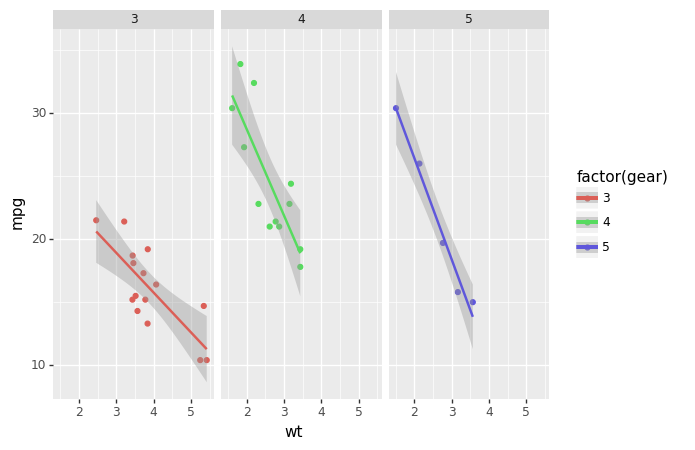

<ggplot: (8742225299197)>

In [88]:
from plotnine import *
from plotnine.data import mtcars

(ggplot(mtcars, aes('wt', 'mpg', color='factor(gear)'))
 + geom_point()
 + stat_smooth(method='lm')
 + facet_wrap('~gear'))

初次接触 ggplot 的读者可能会看不懂上面的代码并且不知道为什么这几句代码的组合可以形成美观的结果图。这正是 ggplot 的强大之处，它有的自己的语法规则：ggplot 绘制图形不是通过单个函数的调用，而是通过一组函数的组合进行实现，每一个函数都有独特的功能。当我们了解其基本原理后，我们就能够轻松驾驭，并且以一推三。

本书接下来会介绍 ggplot 的一些术语并对其基本工作步骤和原理进行解析，以帮助读者了解和基本掌握 ggplot 的语法。如果读者后续对 ggplot 非常感兴趣，可以通过 plotnine 的官方文档以及 R 包 ggplot2 进行进一步学习。

### 13.2.1 ggplot 术语

绘图最重要的有两点：数据与显示效果。数据是我们想要可视化的对象，它包含了若干的变量，变量存储在 DataFrame 的每一列中。

例如，我们常用的 mtcars 数据集每一列包含汽车的不同信息。

In [60]:
mtcars.head()

,name,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


知道数据的信息有哪些后，另一个要点是确定我们想要绘制的图形效果。简单的说，就是图的类型，如点图、线图、箱线图。更详细地说，如果是点图，需要分组吗？不同组别应该怎么体现？点的大小如何？

前面我们接触的绘图库都是将不同类型的图封装为不同的函数或方法，我们根据自己的需要选择其一使用，如果需要进一步细调则需要查看某个函数详细的文档或者通过网络搜索对应的解决办法。

ggplot 的方法则与上述不相同。为了更好地理解，我们将绘图比作做菜。Matplotlib 等库就好像是调制好了某道菜的配方，我们根据配方准备食材按步骤操作；而 ggplot 提供的是做好美食所需要的工具集以及操作工具的方法规则，我们可以按照心意利用不同的工具和食材组合烹饪出不同的菜品。

从学习曲线方面来说，Matplotlib 等库更为简单，但读者花费时间学习 ggplot 上是值得的，因为它有更灵活的操作和更多的可能性。

在学习绘图步骤之前，我们先了解下 ggplot 的一些核心术语：

- 几何对象：它是用以呈现数据的几何图形对象，如条形、线条和点。
- 图形属性：它是几何对象的视觉属性，如 x 坐标和 y 坐标、线条颜色、点的形状等。
- 映射：数值的值和图形属性之间存在着某类映射。
- 标度：它控制着数据空间的值到图形属性空间的值的映射。一个连续型的 y 标度会将较大的数值映射至空间中纵向更高的位置。
- 引导元素：它向看图者展示了如何将视觉属性映射回数据空间。最常见的元素是坐标轴上的刻度线、标签、以及图例。

### 13.2.2 ggplot 初探

在初步了解一些术语后，我们接下来逐步学习绘图的语法和步骤。

在 ggplot 中，图是通过 + 号串联的函数创建的。

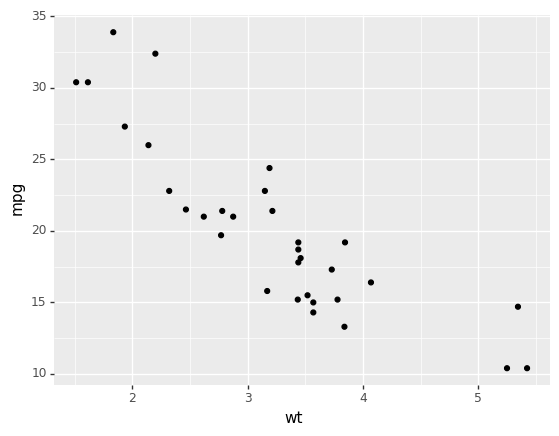

<ggplot: (8742229848869)>

In [74]:
(ggplot(mtcars, aes(x='wt', y='mpg'))
 + geom_point())

上面代码创建了一个基本的点图，整个绘图步骤由 3 个函数协作完成。

- ggplot() - 创建一个 ggplot 对象
- aes() - 创建一个美学映射对象
- geom_point() - 创建一个点的几何对象

ggplot() 初始化图形并指定要用到的数据来源和变量。aes() 函数的功能是指定每个变量扮演的角色（aes 代表 aesthetics，即如何用视觉形式呈现信息)。在这里，变量 wt 的值映射到 x 轴，mpg 的值映射到 y 轴。

ggplot() 函数一般有 2 个参数，第一个是画图的数据，第二个是映射对象。一个映射对象可以指定图形的属性，主要包括 x、y、color、size 等。一般我们绘制的都是二维图，x、y 是最常用的，我们根据自己的需求将 x、y 轴和相应的变量对应起来，即映射。

例如，我们设定 x 轴展示汽车重量，y 轴展示里程数。下面的代码会生成一个带有坐标映射的画布。

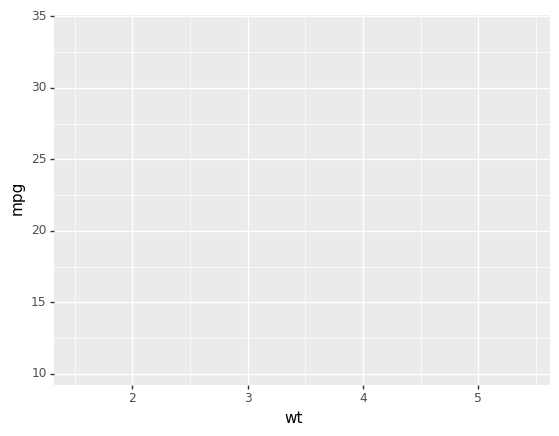

<ggplot: (8742229833313)>

In [76]:
ggplot(mtcars, aes(x='wt', y='mpg'))

当我们建立好画布和坐标映射后，我们接下来思考该用什么几何对象展示两个变量之间的关系：是点图？线图？还是点线结合？

如果是点图，我们在上述代码后面衔接点的几何对象。

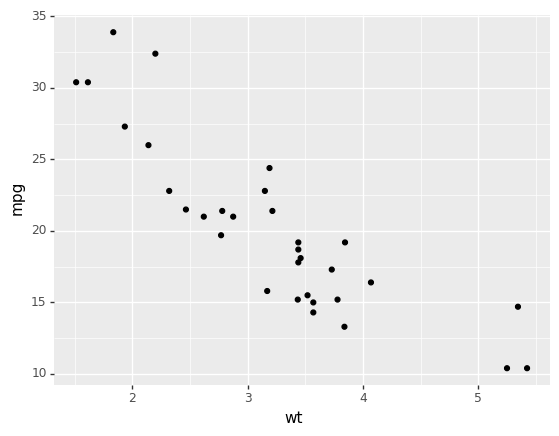

<ggplot: (8742225570073)>

In [77]:
ggplot(mtcars, aes(x='wt', y='mpg')) + geom_point()

我们不难猜想到线图的做法：

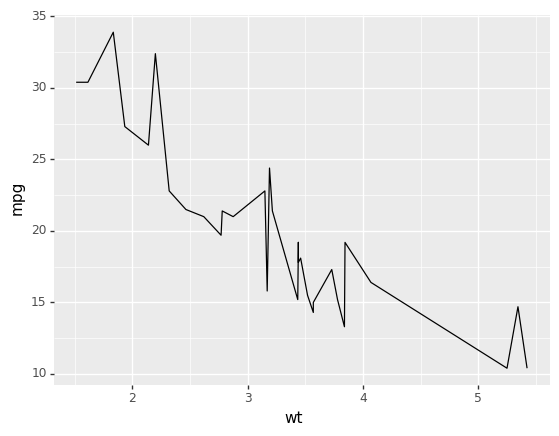

<ggplot: (8742225570129)>

In [78]:
ggplot(mtcars, aes(x='wt', y='mpg')) + geom_line()

不知道读者现在是否感受到了 ggplot 的神奇之处。我们用人可以理解的语言来描述上面两幅图的生成代码：

1. 以 mtcars 作为输入，将 wt 列映射到 x 轴、 mpg 列映射到 y 轴，然后用点绘制一幅图
2. 以 mtcars 作为输入，将 wt 列映射到 x 轴、 mpg 列映射到 y 轴，然后用线绘制一幅图

ggplot 根据这些指令的组合自动生成我们想要的图形。

另外，几何对象是可以层层叠加的。上面的线图并没有展示出线性回归的效果，线性回归是一种平滑几何对象，我们可以轻松地修改为下面代码。注意，当 ggplot 语句写为多行文本时，外部需要一个小括号。

/home/shixiang/miniconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


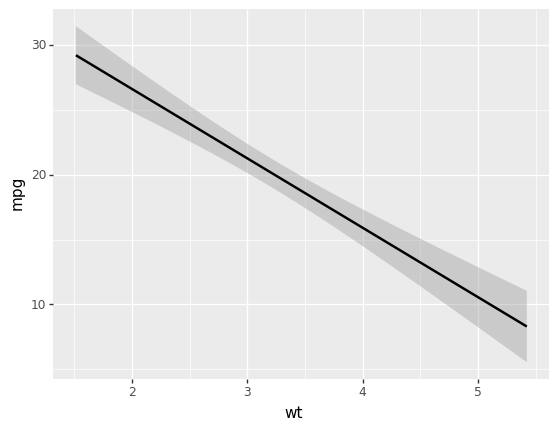

<ggplot: (8742225466865)>

In [79]:
(ggplot(mtcars, aes(x='wt', y='mpg')) 
+ geom_smooth(method="lm"))

我们不妨在后面衔接点的几何对象，展示原始的数据点信息。

/home/shixiang/miniconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


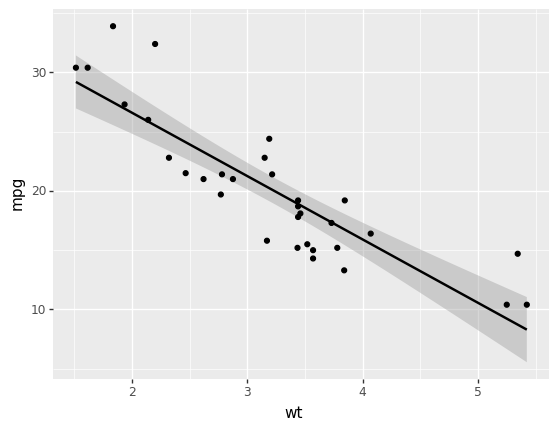

<ggplot: (8742225465981)>

In [80]:
(ggplot(mtcars, aes(x='wt', y='mpg')) 
+ geom_smooth(method="lm")
+ geom_point())

有时候我们需要修改点和线条的颜色，这个可以通过指定几何函数的选项实现。

/home/shixiang/miniconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


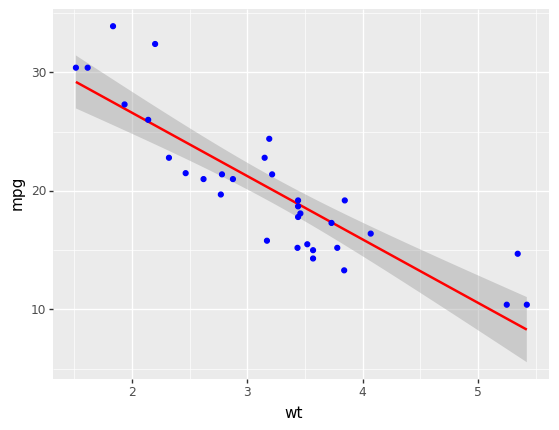

<ggplot: (8742225370989)>

In [87]:
(ggplot(mtcars, aes(x='wt', y='mpg')) 
+ geom_smooth(method="lm", color="red")
+ geom_point(color="blue"))

引导元素包括标签、标题、图例等都可以通过 labs() 函数进行设定或修改。下面代码为上图添加了 x、y 轴标签和标题，以帮助阅读者更好地理解该图的含义。

/home/shixiang/miniconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


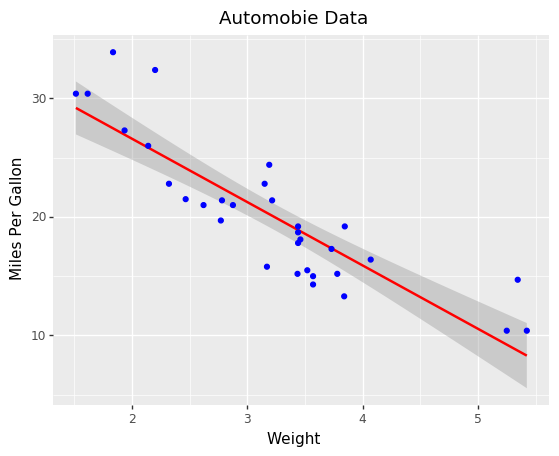

<ggplot: (8742225334973)>

In [89]:
(ggplot(mtcars, aes(x='wt', y='mpg')) 
+ geom_smooth(method="lm", color="red")
+ geom_point(color="blue")
+ labs(title="Automobie Data", x="Weight", y="Miles Per Gallon"))

ggplot 提供了分组和分面的方法。分组指的是在一个图形中显示两组或多组观察结果。分面指的是在单独、并排的图形上显示观察组。需要注意，ggplot 包在定义组或面时使用因子。

因子针对的是分类数据，例如 cyl 是个分类数据，绘图时我们使用 factor(cyl)，否则它会是一个连续值标度。

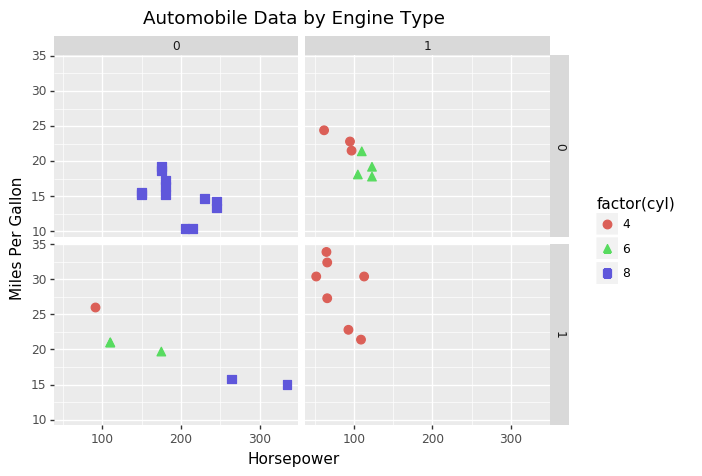

<ggplot: (8742224232105)>

In [96]:
(ggplot(mtcars, aes(x='hp', y='mpg', shape='factor(cyl)', color='factor(cyl)')) + 
    geom_point(size=3) +
    facet_grid('am~vs') +
    labs(title="Automobile Data by Engine Type", x="Horsepower", y="Miles Per Gallon"))

对比下面不使用因子的错误结果图。

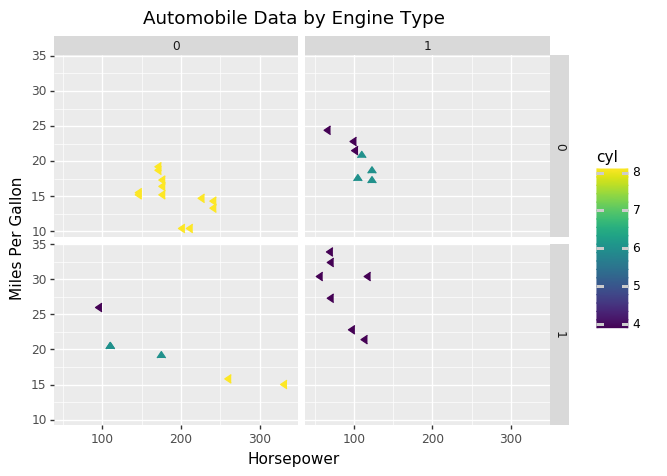

<ggplot: (8742224232817)>

In [101]:
(ggplot(mtcars, aes(x='hp', y='mpg', shape='cyl', color='cyl')) + 
    geom_point(size=3) +
    facet_grid('am~vs') +
    labs(title="Automobile Data by Engine Type", x="Horsepower", y="Miles Per Gallon"))

这里我们使用 facet_grid() 函数进行分面，它可以形成网格状，输入的参数 'am~vs' 表示以 am 作为行，vs 作为列。

### 13.2.3 常见几何函数和选项

ggplot() 函数指定要绘制的数据源和变量，几何函数则指定这些变量如何在视觉上进行表示。以下列出常用的函数。

| 函数             | 添加     | 选项                                         |
| :--------------- | :------- | :------------------------------------------- |
| geom_bar()       | 条形图   | color, fill, alpha                           |
| geom_boxplot()   | 箱线图   | color, fill, alpha, notch, width             |
| geom_density()   | 密度图   | color, fill, alpha, linetype                 |
| geom_histogram() | 直方图   | color, fill, alpha, linetype, binwidth       |
| geom_hline()     | 水平线   | color, aplha, linetype, size                 |
| geom_jitter()    | 抖动点   | color, size, alpha, shape                    |
| geom_line()      | 线图     | colorvalpha, linetype, size                  |
| geom_point()     | 散点图   | color, alpha, shape, size                    |
| geom_rug()       | 地毯图   | color, sides                                 |
| geom_smooth()    | 拟合曲线 | method, formula, color, fill, linetype, size |
| geom_text()      | 文字注解 | 这个非常多,参考相应文档                      |
| geom_violin()    | 小提琴图 | color, fill, alpha, linetype                 |
| geom_vline()     | 垂线     | color, alpha, linetype, size                 |


几何函数有很多通用或常见的选项，汇总如下。


| 选项     | 详述                                                         |
| :------- | :----------------------------------------------------------- |
| color    | 对点、线和填充区域的边界进行着色                             |
| fill     | 对填充区域着色，如条形和密度区域                             |
| alpha    | 颜色的透明度，从0（完全透明）到1（不透明）                   |
| linetype | 图案的线条（1=实线，2=虚线，3=点，4=点破折号，5=长破折号，6=双破折号） |
| size     | 点的尺寸和线的宽度                                           |
| shape    | 点的形状（和pch一样，0=开放的方形，1=开放的圆形，2=开放的三角形，等等） |
| position | 绘制诸如条形图和点等对象的位置。对条形图来说，'dodge'将分组条形图并排，'stacked'堆叠分组条形图，'fill'垂直地堆叠分组条形图并规范其高度相等。对于点来说，'jitter'减少点重叠。 |
| binwidth | 直方图的宽度                                                 |
| notch    | 表示方块图是否应为缺口（TRUE/FALSE)                          |
| sides    | 地毯图的安置（"b"=底部， "l"=左部，"t"=顶部，"r"=右部，"bl"=左下部，等等） |
| width    | 箱线图的宽度                                                 |


下面举个例子来验证一下以上参数的使用:


/home/shixiang/miniconda3/lib/python3.7/site-packages/plotnine/geoms/geom_crossbar.py:83: PlotnineWarning: Notch went outside hinges. Try setting notch=False.
  " Try setting notch=False.", PlotnineWarning)


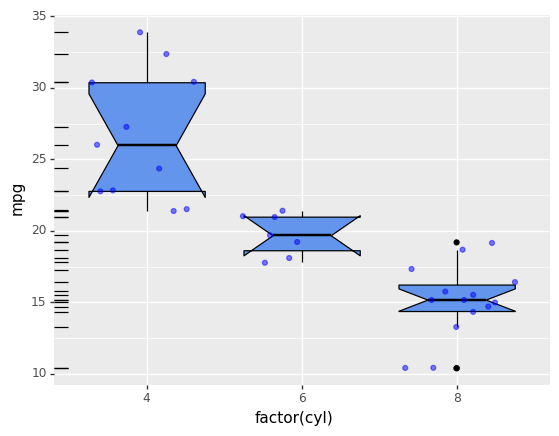

<ggplot: (8742223553313)>

In [102]:
(ggplot(mtcars, aes(x='factor(cyl)', y='mpg')) 
+ geom_boxplot(fill='cornflowerblue', color='black', notch=True)
+ geom_point(position='jitter', color='blue', alpha=0.5)
+ geom_rug(sides='l', color='black'))

## 13.3 Bokeh

Bokeh 是一个交互式可视化库，支持 Web 浏览器，它的目标是同时提供优雅简洁的图形风格和大型数据集的高性能交互功能特性。Bokeh 可以用于快速地创建交互式仪表盘和数据分析应用。

读者可以在终端中使用以下命令之一安装 Bokeh 库：

```bash
# 安装方法 1
conda install bokeh
# 安装方法 2
pip install bokeh
```

接下来本书将通过 Bokeh 官方文档的一些示例来介绍 Bokeh 的基础理念和操作。

### 13.3.1 Bokeh 基础

Bokeh 的设计理念与 ggplot 类似，它采用创建画布并逐一添加图形元素（点、线、弧形等）的方法来构建图形。图形元素在 Bokeh 中被称为 glyphs，它对应 ggplot 中的几何对象（由 geom_ 系列函数生成）。

在使用 Bokeh 绘图时，我们需要导入一些常用函数。

1. figure() - 该函数用于创建图形对象。
2. output_ 系列函数 - 包括 output_file()、output_notebook()和 output_server()，它告诉 Bokeh 如何显示和保存图形。
3. 使用 show() 立即显示图形或 save() 进行图形保存。

上述第 2 点和第 3 点应当结合使用。

在 Jupyter Notebook 中，我们一般使用下面的导入方式：

In [2]:
from bokeh.io import output_notebook, show
from bokeh.plotting import figure

然后我们调用 output_notebook() 函数指定图形输出方式是 notebook，
后面图形绘制完成后使用 show() 函数即可进行显示。

In [4]:
output_notebook()

Loading BokehJS ...

接下来我们学习如何使用 Bokeh 库构建基本图形，请读者观察它的操作方法和效果与前面介绍的图形库的不同之处。

#### 散点图

In [5]:
# 步骤1：使用 figure() 创建图形对象
# 并指定图形的宽高
p = figure(plot_width=400, plot_height=400)
# 步骤2：添加图形元素
# 这里绘制点并指定点的一些属性
# 包括大小、颜色和透明度
p.circle([1, 2, 3, 4, 5], [6, 7, 2, 4, 5], 
         size=15, line_color="navy", 
         fill_color="orange", fill_alpha=0.5)
# 步骤3：展示图形
show(p)

输出的图形除了比基础的 Matplotlib 库构建的图形更美观，右侧出现了一些交互操作选项，包括查看 Bokeh 官方地址、放大图形局部、保存和重置等。另外图形可以通过鼠标滚轮放大缩小。

除了点图，Bokeh 支持很多其他的形状，如下面展示的方块。

In [6]:
p = figure(plot_width=400, plot_height=400)
p.square([1, 2, 3, 4, 5], [6, 7, 2, 4, 5], 
         size=15, color="firebrick", fill_alpha=0.5)
show(p)

#### 线图

线图只需要调用 line() 方法绘制即可，步骤不需要改变。

In [7]:
p = figure(plot_width=400, plot_height=400)
p.line([1, 2, 3, 4, 5], [6, 7, 2, 4, 5], 
         line_width=2)
show(p)

#### 组合图

如果我们想要同时绘制点图和线图，在进行步骤 2 时可以多次绘制图形元素。下面展示了点与线的结合。

In [8]:
# 构建数据
x = [1, 2, 3, 4, 5]
y = [6, 7, 8, 7, 3]

# 步骤1：
p = figure(plot_width=400, plot_height=400)

# 步骤2：
p.line(x, y, line_width=2)
p.circle(x, y, fill_color="white", size=8)

# 步骤3：
show(p)

如果想要绘制其他的图形元素，请读者自行查看官方文档。

### 13.3.2 图形排列

如果需要同时展示多个图形，我们需要进行排列，Bokeh 提供了两种图形排列方法。

#### 水平与垂直排列

bokeh.layouts 模块提供了 row() 和 column() 函数用于水平和垂直排列图形。

我们先构建几个图形：

In [12]:
# 构建数据
x = [1, 2, 3, 4, 5]
y = [6, 7, 8, 7, 3]

# 绘制图形 1
p1 = figure(plot_width=150, plot_height=150)
p1.circle(x, y, 
         size=5, line_color="navy", 
         fill_color="orange", fill_alpha=0.5)

# 绘制图形 2
p2 = figure(plot_width=150, plot_height=150)
p2.square(x, y, 
         size=5, color="firebrick", fill_alpha=0.5)

# 绘制图形 3
p3 = figure(plot_width=150, plot_height=150)
p3.line(x, y, line_width=2)

GlyphRenderer(id='2355', ...)

分别使用水平排列和垂直排列查看效果。

In [13]:
from bokeh.layouts import row, column
# 水平排列
show(row(p1, p2, p3))

In [14]:
# 垂直排列
show(column(p1, p2, p3))

#### 网格排列

Bokeh 库还提供了网格排列函数 gridplot()，这里直接使用前面的图形对象进行操作。

In [15]:
from bokeh.layouts import gridplot
p = gridplot([[p1, p2], [p3, None]], toolbar_location=None)
show(p)

gridplot() 需要传入图形对象列表，列表第 1 个元素表示第 1 行，列表第 2 个元素表示第 2 行，以此类推。None 可以用于填充或者占位。

## 13.4 章末小结

本章介绍了 3 个高级绘图库 Seaborn、Plotnine 和 Bokeh 的基本操作方法，相比于 Matplotlib 库，它们代码更加简单、图形更为美观、能够更容易地处理复杂的数据和需求。

Seaborn 库是 Matplotlib 的升级版，封装了底层绘图逻辑，读者根据不同的绘图需求选择不同的绘图函数进行使用，一些的细节则通过函数的选项进行控制。

Plotnine 库是 ggplot 在 Python 中的实现，它有强大的图形理论支撑，绘图操作灵活多变。虽然它没有 Seaborn 库容易上手，但它可以帮助读者理解图形的构成，推荐读者结合 R 中的 ggplot2 进行系统学习。

Bokeh 库的最大特点是图形优雅简洁和支持交互。本章只是对该库进行了简单的介绍，一些更复杂的操作和交互特性并没有提及。对交互式绘图感兴趣的读者不妨阅读更多的资料进行学习。

总而言之，绘图是数据分析的重要一环，它是提示数据规律、与他人交流想法、汇总资料生成结论的工具，数据分析人员应当熟练掌握基础图形的绘制方法。注意，本书介绍很多的绘图库并不是要求读者全部掌握它们，而是为读者提供不同的解决思路和方法，它们很多的功能起其实是重叠的，入门的读者应当根据自己的需求和兴趣选择其一进行深入的学习和应用。